In [1]:
from PIL import Image
import torch
import torch.nn.functional as F
from torchvision.transforms import transforms
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [18]:
datasets_img_count = []
datasets_img_pct = []

for dataset in os.listdir('data/data'):      
    number_of_bacteria = len(os.listdir(f'data/data/{dataset}/BACTERIA'))
    number_of_normal = len(os.listdir(f'data/data/{dataset}/NORMAL'))
    number_of_virus = len(os.listdir(f'data/data/{dataset}/VIRUS'))
    total = number_of_bacteria+number_of_normal+number_of_virus
    pct_of_bacteria = round(number_of_bacteria/total * 100, 3)
    pct_of_normal = round(number_of_normal/total * 100, 3)
    pct_of_virus = round(number_of_virus/total * 100, 3)

    datasets_img_count.append({"dataset": dataset, "number_of_bacteria": number_of_bacteria, "number_of_normal": number_of_normal, "number_of_virus": number_of_virus})
    datasets_img_pct.append({"dataset": dataset, "pct_of_bacteria": pct_of_bacteria, "pct_of_normal": pct_of_normal, "pct_of_virus": pct_of_virus})
    
    print(f'{dataset}:\nbacteria: {pct_of_bacteria}\nnormal: {pct_of_normal}\nvirus: {pct_of_virus}') 

datasets_img_count_df = pd.DataFrame(datasets_img_count).set_index("dataset").transpose()
datasets_img_pct_df = pd.DataFrame(datasets_img_pct).set_index("dataset").transpose()

test:
bacteria: 38.782
normal: 37.5
virus: 23.718
train:
bacteria: 48.581
normal: 25.709
virus: 25.709
val:
bacteria: 25.0
normal: 50.0
virus: 25.0


In [20]:
datasets_img_pct_df.drop(columns=["val"], inplace=True)
datasets_img_pct_df

dataset,test,train
pct_of_bacteria,38.782,48.581
pct_of_normal,37.500,25.709
pct_of_virus,23.718,25.709


In [19]:
datasets_img_count_df.drop(columns=["val"], inplace=True)
datasets_img_count_df

dataset,test,train
number_of_bacteria,242,2534
number_of_normal,234,1341
number_of_virus,148,1341


In [22]:
datasets_img_count_df["test"].sum()

624

In [23]:
raw_images = []

tensor_to_pil = transforms.ToPILImage()
pil_to_tensor = transforms.ToTensor()


for dataset in os.listdir('data/data'):
    for category in os.listdir(f'data/data/{dataset}'):
        
        number_of_images = len(os.listdir(f'data/data/{dataset}/{category}'))
        print(f'{dataset} {category}: {number_of_images}') 

        for image in os.listdir(f'data/data/{dataset}/{category}'):
            file_path = f'data/data/{dataset}/{category}/{image}'
            img_pil = Image.open(file_path)
            mode = img_pil.mode
            format = img_pil.format
            
            img_tensor = pil_to_tensor(img_pil)
            channels = img_tensor.shape[0]
            height = img_tensor.shape[1]
            width = img_tensor.shape[2]

            raw_images.append({"dataset":dataset,
                               "category":category,
                               "image": image,
                               "mode":mode,
                               "format":format,
                               "channels":channels,
                               "width":width,
                               "height":height})
            

raw_images_df = pd.DataFrame(raw_images)

        

test BACTERIA: 242
test NORMAL: 234
test VIRUS: 148
train BACTERIA: 2534
train NORMAL: 1341
train VIRUS: 1341
val BACTERIA: 4
val NORMAL: 8
val VIRUS: 4


In [14]:
raw_images_df["format"].describe()


count     5856
unique       1
top       JPEG
freq      5856
Name: format, dtype: object

In [15]:
raw_images_df["mode"].value_counts()

# If you have an L mode image, that means it is a single channel image - normally interpreted as greyscale. 
# The L means that is just stores the Luminance. It is very compact, but only stores a greyscale, not colour.
# img_pil = img_pil.convert("L")

L      5573
RGB     283
Name: mode, dtype: int64

In [16]:
raw_images_df["channels"].value_counts()

1    5573
3     283
Name: channels, dtype: int64

,height,width
count,5856.000000,5856.000000
mean,970.689037,1327.880806
std,383.392117,363.500922
min,127.000000,384.000000
25%,688.000000,1056.000000
50%,888.000000,1281.000000
75%,1187.000000,1560.000000
max,2713.000000,2916.000000


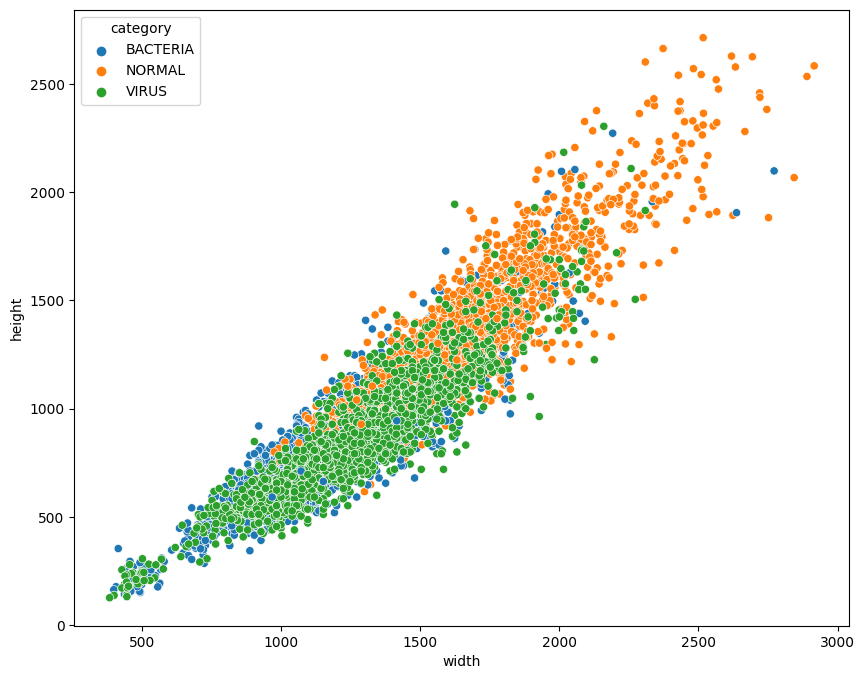

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=raw_images_df, x="width", y="height", hue="category")
raw_images_df[["height","width"]].describe()

In [55]:
bacteria_array = np.array(raw_images_df[raw_images_df["category"] == "BACTERIA"].index)
normal_array = np.array(raw_images_df[raw_images_df["category"] == "NORMAL"].index)
virus_array = np.array(raw_images_df[raw_images_df["category"] == "VIRUS"].index)

sample_img_arrays = [np.random.choice(bacteria_array),
                    np.random.choice(normal_array),
                    np.random.choice(virus_array)]
sample_labels = ["BACTERIA", "NORMAL", "VIRUS"]


In [66]:
i=0
dataset = raw_images_df.iloc[sample_img_arrays[i]].dataset
image = raw_images_df.iloc[sample_img_arrays[i]].image
label = sample_labels[i]

file_path = f'data/data/{dataset}/{label}/{image}'
img_pil = Image.open(file_path)
img_pil = img_pil.resize((224,224))




torch.Size([1, 224, 224])

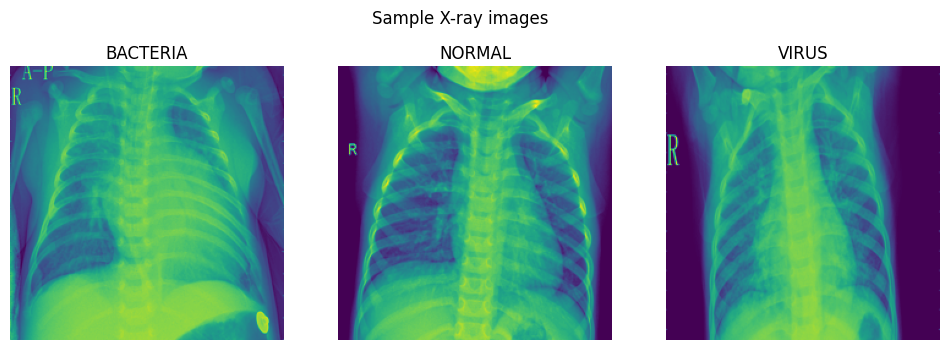

In [143]:
bacteria_array = np.array(raw_images_df[raw_images_df["category"] == "BACTERIA"].index)
normal_array = np.array(raw_images_df[raw_images_df["category"] == "NORMAL"].index)
virus_array = np.array(raw_images_df[raw_images_df["category"] == "VIRUS"].index)

# sample_img_arrays = [np.random.choice(bacteria_array),
#                     np.random.choice(normal_array),
#                     np.random.choice(virus_array)]

sample_img_arrays = [1388, 3798, 4591]
sample_labels = ["BACTERIA", "NORMAL", "VIRUS"]

fig, axes = plt.subplots(1,3, figsize=(12,4))
fig.suptitle("Sample X-ray images")

for i in range(len(sample_img_arrays)):

    dataset = raw_images_df.iloc[sample_img_arrays[i]].dataset
    image = raw_images_df.iloc[sample_img_arrays[i]].image
    label = sample_labels[i]

    file_path = f'data/data/{dataset}/{label}/{image}'
    img_pil = Image.open(file_path)
    img_pil = img_pil.resize((224,224))
    img_pil = img_pil.convert("L")

    axes[i].imshow(img_pil)
    axes[i].set_title(label)
    axes[i].axis('off')

In [142]:
sample_img_arrays

[1388, 3798, 4591]